# Introduction to Markov Chains

Consider a random variable $X$ (e.g. a coin toss, or a dice roll). A single instance is a random variable. A sequence of such instances $\{X_n\}$ is a *stochastic process*. This sequence can be discrete-timed or continuous timed. The term "time" is to be interpreted loosely---it can refer to anything from a second-to-second recording of fluctuation in stock prices to the number of month-to-month visitors at a tomb to the counting of randomly placed balls in a number of baskets. 

#### **Markov Property**

In a stochastic process of such a sequential nature with many many instances of a random variable which may depend on none of the previous values to all of the previous values, it can get incredibly difficult to study them. The *Markov property* is a special propoerty imposed on a subset of discrete stochastic processes which makes their analysis easier. 

Markov property refers to the dependence of the next state $X_{n+1}$ on just the current state $X_n$ and none of the earlier states. That is:

$\mathbb{P}(X_{n+1} = x_{n+1} | X_n = x_n, X_{n-1} = x_{n-1}, \cdots, X_1 = x_1, X_0 = x_0) = \mathbb{P}(X_{n+1} = x_{n+1} | X_n = x_n)$

meaning that the values of $X_{n-1}, \cdots, X_1 = x_1, X_0$ are irrelevant to the possible values which $X_{n+1}$ can take.

# Random Walk

#### **Simple Random Walk**

A simple random walk is a process where starting at 0, in the next step you can either go 1 up or go 1 down, with probability $p$ and $q = 1-p$ respectively. Although simple, it can be used to model many complex processes such as stock prices, population, grocery market lines etc. 

If $p = q = 1/2$, it is called a simple symmetric random walk.

Mathematically, it can be written in the following two ways:

**First Method:**

$$ X_{n+1}= \left\{
\begin{array}{ll}
X_n + 1 & \text{probability }p \\
X_n - 1 & \text{probability }1-p \\
\end{array}
\right. $$

with $X_0 = 0$. Since $X_{n+1} = f(X_n) =>$ future depends on the present but not past $=>$ markov property holds.

**Second Method:**

$$X_n = X_0 + \sum_{i = 1}^{n}{Z_i}$$

such that $X_0 = 0$ and $Z_i$ are independently and identically distributed (IID) random variables with distribution $\mathbb{P}(Z=1)=p$ and $\mathbb{P}(Z=-1)=1-p$.

Here is a short code to simulate a simple random walk with probabilities $p$ and $1 - p$.

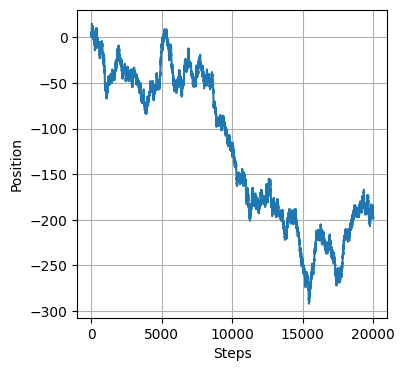

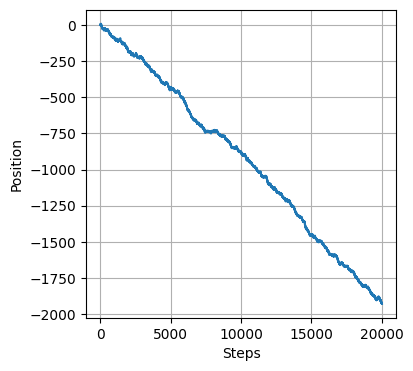

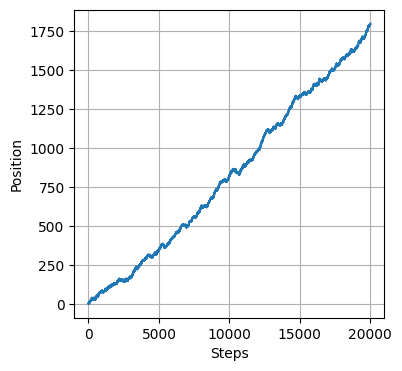

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def random_walk(p, num_steps):
    q = 1-p

    # Generate random steps
    steps = np.random.choice([1, -1], size=num_steps, p=[p, q])

    # Compute the random walk
    walk = np.cumsum(steps)

    plt.figure(figsize=(4, 4))
    plt.plot(walk)
    plt.xlabel('Steps')
    plt.ylabel('Position')
    plt.grid(True)
    plt.show()

    return walk

walk = random_walk(p=0.50, num_steps=20000)
walk = random_walk(p=0.45, num_steps=20000)
walk = random_walk(p=0.55, num_steps=20000)

#### **General Random Walk**

Any random walk, written as the second form described above:

$$X_n = X_0 + \sum_{i = 1}^{n}{Z_i}$$

is a general random walk with any $X_0$ and IID $Z_i$'s with any distribution.

General random walks can also be defined on higher spaces, i.e. instead of just up/down, you could also be going left/right or in other directions discretely or even have a continuous distribution of $Z$. 

#### **Expectation**

The formula for a general random walk can be used to compute the expectation for such a walk.

$$\mathbb{E}[X_n] = \mathbb{E}[X_0] + \sum_{i = 1}^{n}\mathbb{E}[{Z_i}] = \mathbb{E}[X_0] + n\mathbb{E}[{Z_1}]$$

For simple random walk: 

$E[X_0] = 0$ and 

$E[Z_1] = \sum_{z \in \mathbb{Z}}z\mathbb{P}(Z_1 = z) = 1*p + (-1)*q = (p-q)$

$$=> \mathbb{E}[X_n] = n(p-q)$$

#### **Variance**


The variance can be computed similarly:

$$\text{Var}(X_n) = \text{Var}(X_0) + \sum_{i = 1}^{n}\text{Var}({Z_i}) = \text{Var}(X_0) + n\text{Var}({Z_1})$$

For a simple random walk:

$\text{Var}(X_0) = 0$ and

$\text{Var}(Z_1) = E[(Z_1 - E[Z_1])^2] = E[(Z_1 - (p - q))^2] = p*(1 - (p-q))^2 + q*(-1 - (p-q))^2$

$= p*(2q)^2 + q*(-2p)^2 = 4pq^2 + 4qp^2 = 4pq(p+q) = 4pq(1) = 4pq$

$$ => \text{Var}(X_n) = 4npq $$

#### **Distribution of Simple Random Walk**

Given the state $i$ and number of steps taken $n$, it is possible to write the probability $\mathbb{P}(X_n = i)$ for a simple random walk with probability $p$ of going up and probability $1-p = q$ of going down at any step. 

Let $U_n$ be the number of upward steps in the $n$ steps, then $U_n \sim \text{Bin}(n, p)$. 

$$ => \mathbb{P}(U_n = k) = {}^nC_k p^k q^{n - k} $$

If upwards steps $U_n = k$ in total $n$ steps, it means we took $k$ up steps and $n-k$ down steps, leaving us at position $k - (n - k) = 2k - n$. 

$$ => \mathbb{P}(X_n = 2k - n) = \mathbb{P}(U_n = k) = {}^nC_k p^k q^{n - k} $$

For odd $n$, $2k -n$ is odd and otherwise for even $n$. For the given state $i$, take $i = 2k - n => n = (n+i)/2$ and $n - k = (n - i)/2$, leaving us with the following rearranged formula

$$ => \mathbb{P}(X_n = i) = {}^nC_{(n+i)/2} p^{(n+i)/2} q^{(n-i)/2} $$